<a href="https://colab.research.google.com/github/wanyangajnr/zindiProjects/blob/master/potholeclassification_zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The pothole classification challenge **
Commissioned by the Machine Inteligence Institute of Africa (MIIA)

**PROBLEM**
Potholes on Roads have become a big problem in South Africa with the Government spending over R22 billion from 2016 through 2019

**AIM / GOAL**
Create a Machine Learning Model with the aim of detecting if an image contains a pothole or not


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from skimage import io

In [ ]:
#Importing the dataset by mounting it from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AG1PWG0ZkOzRku4wORaEzVUcqncKGJkBJzWMjOfbQA-L6yW6krnszM
Mounted at /content/gdrive


Create directories in google colab and unzip the all data 

In [ ]:
# !mkdir -p {all_images_path,train_images_path,test_images_path,validation_images_path}
!mkdir -p '/content/pot_hole/combined'
!mkdir -p '/content/pot_hole/train/pothole'
!mkdir -p '/content/pot_hole/train/no_pothole'
!mkdir -p '/content/pot_hole/test/'
!mkdir -p '/content/pot_hole/test/test/'

In [ ]:
# !unzip -q zip_source  -d  unzip_target
!unzip -q '/content/gdrive/My Drive/colabDatasets/miia_pothole_challenge/pothole.zip' -d '/content/pot_hole/combined'

In [ ]:
# Environmental paths for future reference
all_images_path = '/content/pot_hole/combined/all_data/'
train_dir = '/content/pot_hole/train/'
train_pothole = '/content/pot_hole/train/pothole'
train_no_pothole = '/content/pot_hole/train/no_pothole'
test_dir = '/content/pot_hole/test/'
test_dir_new = '/content/pot_hole/test/test/'

In [ ]:
#importing the csv files with the train and test images 
train_images = pd.read_csv("/content/gdrive/My Drive/colabDatasets/miia_pothole_challenge/train_ids_labels.csv")
test_images = pd.read_csv("/content/gdrive/My Drive/colabDatasets/miia_pothole_challenge/test_ids_only.csv")

In [ ]:
train_images['Image_ID'] = train_images['Image_ID'].astype(str)+'.JPG'

In [ ]:
test_images['Image_ID'] = test_images['Image_ID'].astype(str)+'.JPG'

In [ ]:
train_images.head(5)

,Image_ID,Label
0,cVOfkSdqnWXUerr.JPG,0
1,EhnvIDPXFFjUhkR.JPG,0
2,tYKqoStvHsryFhS.JPG,1
3,eSpjlsZIwOMLmUS.JPG,1
4,uzxhIXjNENLyHwZ.JPG,1


In [ ]:
#Moving train images from the combined file to the main directory
#Train Images
for index, row in train_images.iterrows(): 
    src = all_images_path + row['Image_ID']
    if row['Label'] == 1:
      dst = train_pothole + '/'+row['Image_ID']
    else:
      dst = train_no_pothole +'/'+ row['Image_ID']
    shutil.move(src, dst)
print(train_pothole," count is ", len(os.listdir(train_pothole)))
print(train_no_pothole, "count is", len(os.listdir(train_no_pothole)))

/content/pot_hole/train/pothole  count is  1661
/content/pot_hole/train/no_pothole count is 2365


In [ ]:
#Test images
for item in os.listdir(all_images_path):
  src = all_images_path + item
  dst = test_dir_new + item
  shutil.move(src, dst)
print(test_dir," count is ",len(os.listdir(test_dir_new)))

/content/pot_hole/test/  count is  1650


In [ ]:
#Visualization
def display_images(image_path):
    images = []
    labels = []
    file_names =[]
    image_file_names = [os.path.join(image_path, f) for f in os.listdir(image_path)]        
    # Read the images and load them into an array
    for file in image_file_names[0:3]:         
      image=io.imread(file) #io package from SKimage package
      images.append(np.array(image))
      file_names.append(file)
      
      #Display image
      plt.axis('off')
      plt.imshow(image)
      plt.show()
      print("Size of this image is " + str(image.shape))
      print("Image path is " + str(file))        
      # print("Image name is " + str(image_names[index]))   

    return images,  file_names #labels

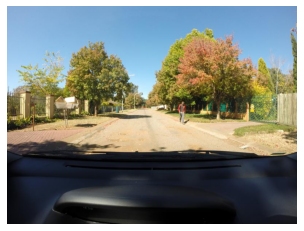

Size of this image is (600, 800, 3)
Image path is /content/pot_hole/train/pothole/QtNtmCGccwryzUm.JPG


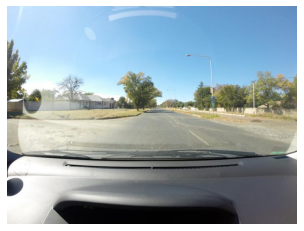

Size of this image is (600, 800, 3)
Image path is /content/pot_hole/train/pothole/xWmDwYOeccFqbHQ.JPG


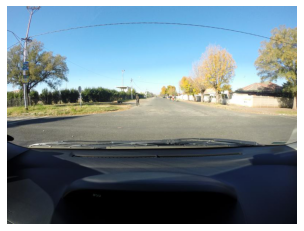

Size of this image is (600, 800, 3)
Image path is /content/pot_hole/train/pothole/tYKqoStvHsryFhS.JPG


In [ ]:
images, file_names = display_images(train_pothole)

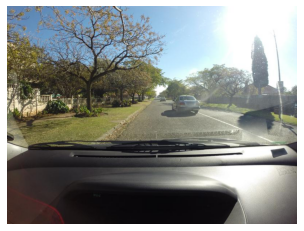

Size of this image is (600, 800, 3)
Image path is /content/pot_hole/train/no_pothole/PwxXAjuNqjwdRzu.JPG


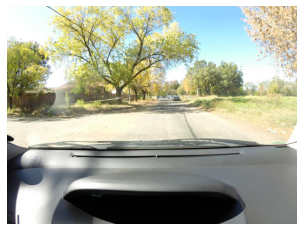

Size of this image is (600, 800, 3)
Image path is /content/pot_hole/train/no_pothole/athmIBtWCkWLxpE.JPG


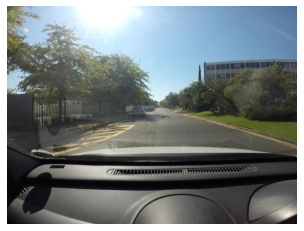

Size of this image is (600, 800, 3)
Image path is /content/pot_hole/train/no_pothole/gmYzDUtlvPkqhcv.JPG


In [ ]:
images, file_names = display_images(train_no_pothole)

Modelling

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

In [ ]:
#define image properties
Image_width = 128
Image_height = 128
Image_Size = (Image_width, Image_height)
Image_channels = 3

In [ ]:
#the network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (Image_width, Image_width, Image_channels)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [ ]:
#Define Call backs and learning rate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
#df

In [ ]:
df = train_images.copy()

In [ ]:
#Manage data
df = train_images
df["Label"] = df["Label"].replace({0:'no_pothole',1:'pothole'})

train_df, validate_df = train_test_split(df, test_size = 0.20, random_state = 42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop = True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

In [ ]:
#The image generator
split = 0.2
datagen = ImageDataGenerator(validation_split=split, 
                             rescale=1./255,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True)


train_generator = datagen.flow_from_directory('/content/pot_hole/train/',
                                                    target_size=Image_Size, 
                                                    class_mode = 'categorical', 
                                                    batch_size=batch_size, 
                                              subset='training')

#validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = datagen.flow_from_directory('/content/pot_hole/train/', 
                                                              target_size=Image_Size,
                                                              class_mode='categorical',
                                                              batch_size=batch_size,
                                                   subset='validation'
                                                             )

test_datagen = ImageDataGenerator(rotation_range=15,
                                 rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)



test_generator = datagen.flow_from_directory('/content/pot_hole/test/', class_mode='binary',
                                             batch_size = batch_size, target_size = Image_Size)

Found 3221 images belonging to 2 classes.
Found 805 images belonging to 2 classes.
Found 1650 images belonging to 1 classes.


In [ ]:
#model training
epochs = 50

history = model.fit_generator(
train_generator,
epochs = epochs,
validation_data = validation_generator,
validation_steps=total_validate//batch_size,
steps_per_epoch = total_train//batch_size,
callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
214/214 [==============================] - 42s 196ms/step - loss: 0.8035 - accuracy: 0.6656 - val_loss: 2.0029 - val_accuracy: 0.6252
Epoch 2/50
214/214 [==============================] - 42s 194ms/step - loss: 0.6144 - accuracy: 0.6996 - val_loss: 2.1906 - val_accuracy: 0.6101
Epoch 3/50
214/214 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 0.7321
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
214/214 [==============================] - 43s 200ms/step - loss: 0.5366 - accuracy: 0.7321 - val_loss: 1.5268 - val_accuracy: 0.4604
Epoch 4/50
214/214 [==============================] - 42s 195ms/step - loss: 0.4833 - accuracy: 0.7726 - val_loss: 1.0358 - val_accuracy: 0.4717
Epoch 5/50
214/214 [==============================] - 42s 194ms/step - loss: 0.4616 - accuracy: 0.7895 - val_loss: 0.4912 - val_accuracy: 0.7572
Epoch 6/50
214/214 [==============

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

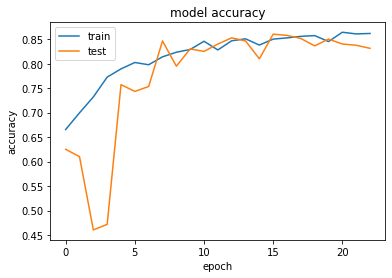

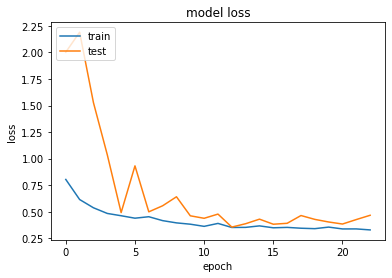

In [ ]:
#Visualizing the loss and the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Test Data Preparation
test_filenames = os.listdir("/content/pot_hole/test/test")

test_df = pd.DataFrame({
    'Image_ID': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
nb_samples

1650

In [ ]:
#Making the predictions
predict = model.predict_generator(test_generator,
                                 steps = np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
#convert labels to categories
test_df['Label'] = np.argmax(predict, axis=1)

label_map = dict((v,k) for k,v in
                train_generator.class_indices.items())

test_df['Label'] = test_df['Label'].replace(label_map)

test_df['Label'] = test_df['Label'].replace({'pothole': 1,'no_pothole': 0})

In [ ]:
test_df.head(10)

,Image_ID,Label
0,EMgYfHWScUoxKPz.JPG,1
1,XsddZMXSGWqLDJa.JPG,1
2,eFMYzmtVzhCBMIH.JPG,1
3,PXxHMxjYOUmQNAw.JPG,0
4,kCfLswQztenQiZN.JPG,1
5,bMkoQDbggBrQGMj.JPG,1
6,nejzCFfvyEnTYju.JPG,1
7,JOmRkTYySbrSeOw.JPG,0
8,GimXkKSJQXtPidy.JPG,0
9,ZghFqBtZjgFNhEd.JPG,1


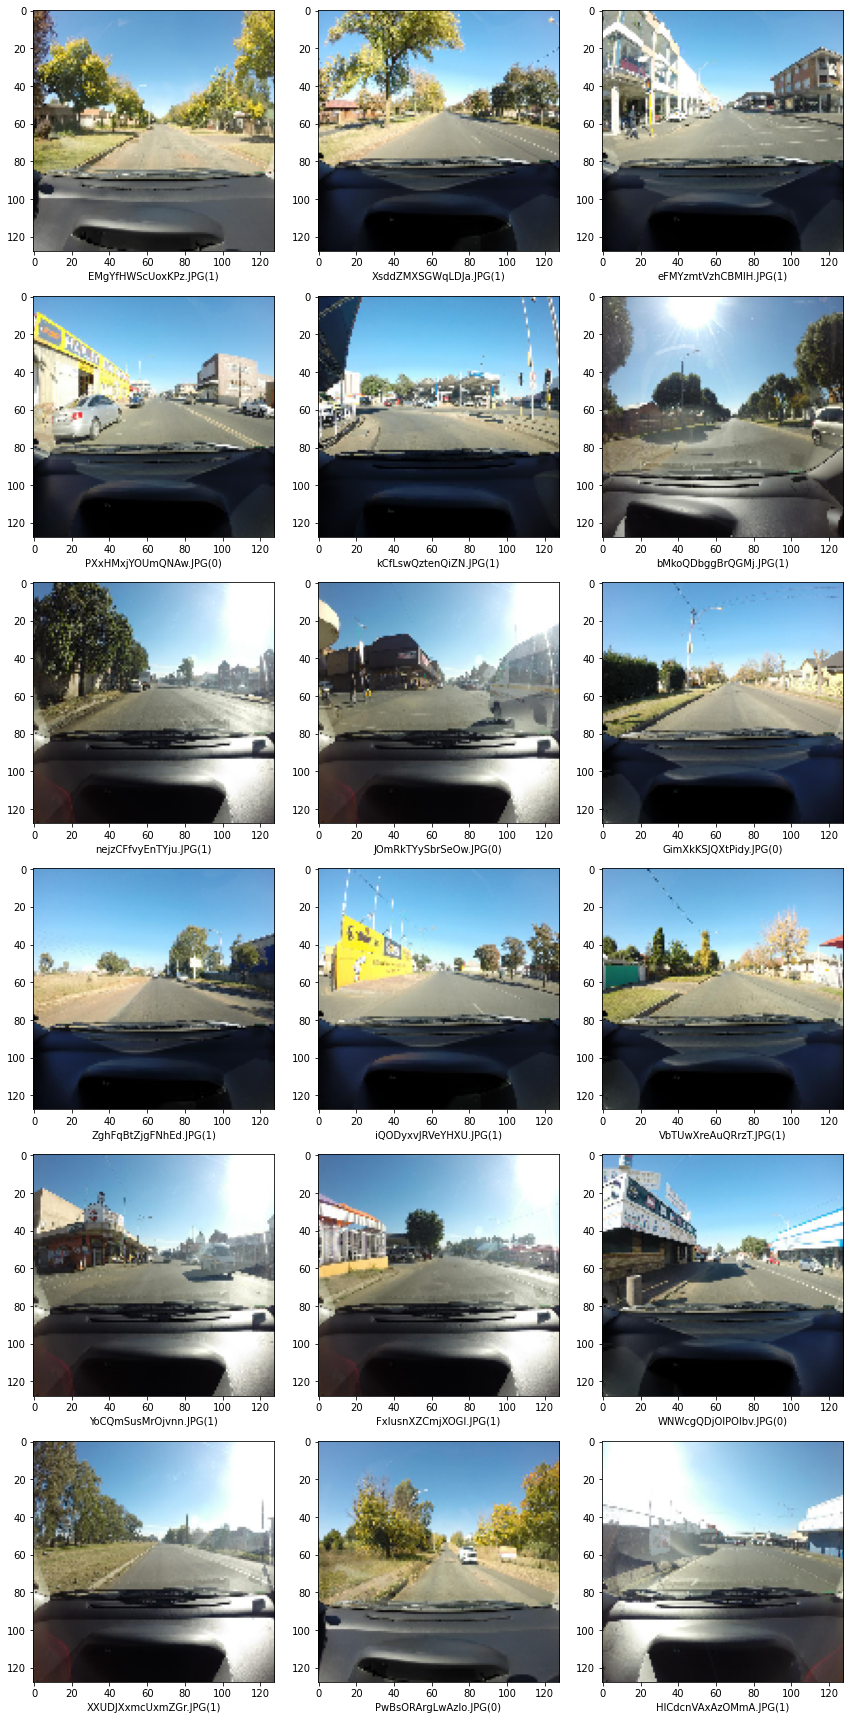

In [ ]:
#Visualize the prediction results

sample_test = test_df.head(18)
sample_test.head()

plt.figure(figsize = (12,24))

for index, row in sample_test.iterrows():
    image_id = row['Image_ID']
    label = row['Label']
    img = load_img("/content/pot_hole/test/test/" + image_id,target_size = Image_Size)
    
    plt.subplot(6,3, index+1)
    plt.imshow(img)
    plt.xlabel(image_id + '('+"{}".format(label) + ')')
plt.tight_layout()
plt.show()